In [1]:
## import necessary libraries
import numpy as np
import pandas as pd

## read the raw data file
df = pd.read_csv('raw_data/diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

# drop duplicates
df.drop_duplicates(inplace=True)

# convert data types
df[['Diabetes_binary','GenHlth', 'Age', 'Education','Income']] = df[['Diabetes_binary','GenHlth', 'Age', 'Education','Income']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  int64  
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  int64  
 15  

In [2]:
#slice the dataframe for feature and label
df_copy = df.copy(deep=True)
X, y = df_copy.iloc[:,1:], df_copy.iloc[:,0]
print(X.shape)
print(y.shape)

#get dummies
def get_dummies(X):

    # Identify discrete columns with more than 2 categories
    discrete_columns = [col for col in X.columns if X[col].nunique() > 2 and X[col].dtype != 'float64']

    # Create dummy variables for these columns
    df_with_dummies = pd.get_dummies(X, columns=discrete_columns, drop_first=True)

    return df_with_dummies
X = get_dummies(X)
X

(229474, 21)
(229474,)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,1,0,0,0,0,0,0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

## Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
ros = RandomOverSampler(random_state=42)

# fit and apply the transform
X_over, y_over = ros.fit_resample(X_train, y_train)

In [5]:
## Standard scaling
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_over)
X_scaled_test = scalar.fit_transform(X_test)

In [9]:
# Moving forward with l2 logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Training the logistic regression model
clf = LogisticRegression(penalty='l2', solver = 'newton-cg', max_iter = 1000)

clf.fit(X_scaled, y_over)

# Making predictions
y_pred = clf.predict(X_scaled_test)
y_pred_proba = clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))
print(confusion_matrix(y_test, y_pred))

accuracy : 0.6227475759886698  precision : 0.2737395607794618 
 recall : 0.8758659691785664  f1 : 0.41711553999461354
[[44772 32872]
 [ 1756 12390]]


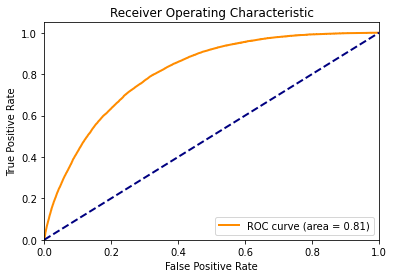

In [10]:
# Calculate FPR, TPR, and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [24]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Setting up the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_scaled, y_over)

# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))
print(confusion_matrix(y_test, y_pred))

accuracy : 0.6779714565856847  precision : 0.26194668396503257 
 recall : 0.5994627456524813  f1 : 0.36458221371912547
[[53751 23893]
 [ 5666  8480]]


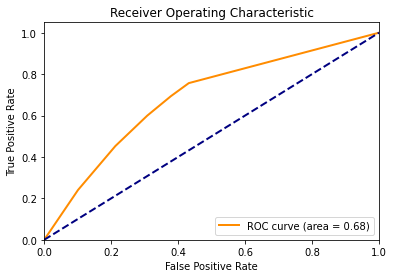

In [25]:
# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]

# Calculate FPR, TPR, and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [12]:
## we can see that both logistic regression and KNN perform very poorly, lets try more models

## Decision trees
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = tree_clf.predict(X_scaled_test)
y_pred_proba = tree_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))
print(confusion_matrix(y_test, y_pred))

accuracy : 0.7766314413334786  precision : 0.29281011668079004 
 recall : 0.3175455959281776  f1 : 0.3046766371621393
[[66795 10849]
 [ 9654  4492]]


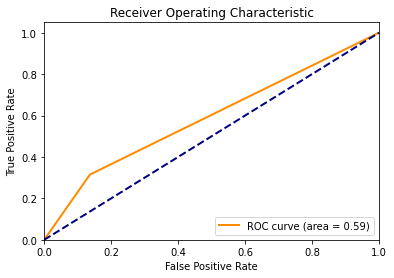

In [13]:
# Making predictions
y_pred = tree_clf.predict(X_scaled_test)
y_pred_proba = tree_clf.predict_proba(X_scaled_test)[:, 1]

# Calculate FPR, TPR, and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [14]:
## implement the naive bayes algorithm

from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = NB_clf.predict(X_scaled_test)
y_pred_proba = NB_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))
print(confusion_matrix(y_test, y_pred))

accuracy : 0.5834513563569016  precision : 0.2480599075449202 
 recall : 0.8383288562137706  f1 : 0.3828386034574596
[[41696 35948]
 [ 2287 11859]]


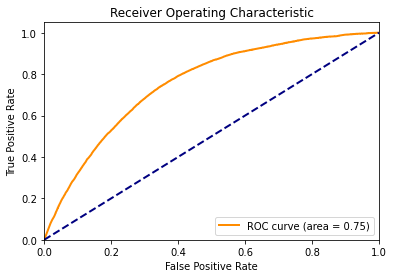

In [15]:
# Making predictions
y_pred = NB_clf.predict(X_scaled_test)
y_pred_proba = NB_clf.predict_proba(X_scaled_test)[:, 1]

# Calculate FPR, TPR, and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
## random forest prediction

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300, n_jobs=-1, class_weight='balanced')
rf_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = rf_clf.predict(X_scaled_test)
y_pred_proba = rf_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))
print(confusion_matrix(y_test, y_pred))

accuracy : 0.8314086501797582  precision : 0.6584193017462209 
 recall : 0.6209696427891319  f1 : 0.6347496859297199
[[71834  5810]
 [ 9665  4481]]


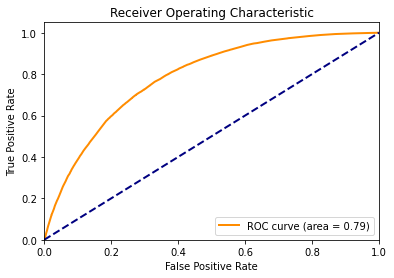

In [17]:
# Making predictions
y_pred = rf_clf.predict(X_scaled_test)
y_pred_proba = rf_clf.predict_proba(X_scaled_test)[:, 1]

# Calculate FPR, TPR, and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [18]:
## gradient boosing decision trees (GBDT)
from sklearn.ensemble import GradientBoostingClassifier

GBDT_clf = GradientBoostingClassifier(n_estimators=300)
GBDT_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = GBDT_clf.predict(X_scaled_test)
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.7016777426734938  precision : 0.6297481029608873 
 recall : 0.7359622246209836  f1 : 0.6218046802116612


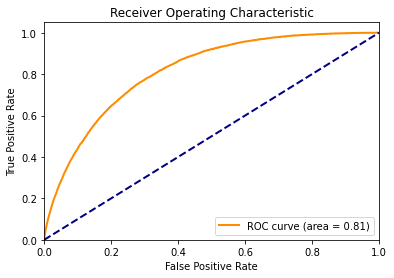

In [19]:
# Making predictions
y_pred = GBDT_clf.predict(X_scaled_test)
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)[:, 1]

# Calculate FPR, TPR, and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=300)
ada_clf.fit(X_scaled, y_over)

# Making predictions
y_pred = ada_clf.predict(X_scaled_test)
y_pred_proba = ada_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))
print(confusion_matrix(y_test, y_pred))

accuracy : 0.705567055234775  precision : 0.6310524956329184 
 recall : 0.7372494676624732  f1 : 0.6246906801303278
[[53687 23957]
 [ 3069 11077]]


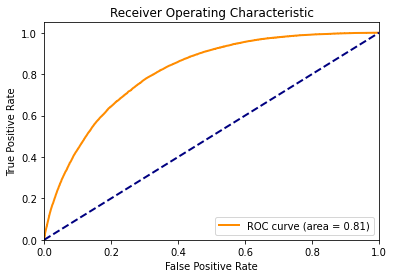

In [21]:
# Making predictions
y_pred = ada_clf.predict(X_scaled_test)
y_pred_proba = ada_clf.predict_proba(X_scaled_test)[:, 1]

# Calculate FPR, TPR, and Thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

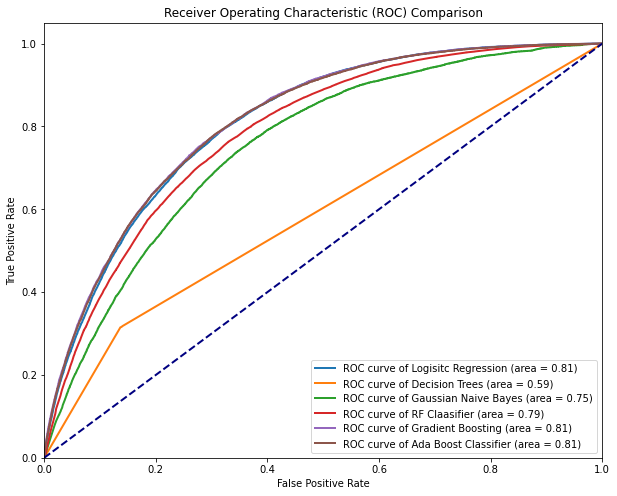

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have classifiers clf1, clf2, ..., clfn
# and their respective predictions y_pred_proba1, y_pred_proba2, ..., y_pred_proban

classifiers = {
    "Logisitc Regression": clf,
    # "KNN Classifier": knn,
    "Decision Trees":tree_clf,
    "Gaussian Naive Bayes": NB_clf,
    "RF Claasifier": rf_clf,
    "Gradient Boosting": GBDT_clf,
    "Ada Boost Classifier": ada_clf
    # Add more classifiers as needed
}

# Plot ROC Curves
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    # Fit the classifier (if not already fitted)
    # clf.fit(X_train, y_train)

    # Make predictions
    y_pred_proba = clf.predict_proba(X_scaled_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, lw=2, label='ROC curve of %s (area = %0.2f)' % (name, roc_auc))

# Plot the random chance line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Comparison')
plt.legend(loc="lower right")
plt.show()
## added annotation